In [1]:
# !pip install mapie -q
# !pip install catboost optuna -q

In [2]:
# data handling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Normalization
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

# Get multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Train/Test splitting
from sklearn.model_selection import train_test_split

# tuning
import optuna

# Modeling
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from mapie.regression import MapieRegressor


# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# Birth Weight Prediction

## Strategy 

## Data exploration
- Upload the data ✅
- Descriptive statistics ✅
- Resort columns 
- Cross-features correlations

In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
# Describing the dataset

pd.set_option('display.max_columns', None)
print('--------------')
print('Rows, Columns:')
print('--------------')
df.shape
print('---------------')
print("Columns' names:")
print('---------------')
df.columns
print('-----------------')
print('Column / Datatype:')
print('-----------------')
df.dtypes
print('-----------------')
df.head(10)
print('---------------------')
print('Descriptive statistic:')
print('---------------------')
round(df.describe())
print('-----------------------')
print('The sum of null values:')
print('-----------------------')
print(df.isnull().sum())
print('-----------------------')
print('The sum of NaN values:')
print('-----------------------')
df.isna().sum()
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

--------------
Rows, Columns:
--------------


(108082, 38)

---------------
Columns' names:
---------------


Index(['id', 'ATTEND', 'BFACIL', 'BMI', 'CIG_0', 'DLMP_MM', 'DMAR', 'DOB_MM',
       'DOB_TT', 'DOB_WK', 'FAGECOMB', 'FEDUC', 'ILLB_R', 'ILOP_R', 'ILP_R',
       'LD_INDL', 'MAGER', 'MBSTATE_REC', 'MEDUC', 'M_Ht_In', 'NO_INFEC',
       'NO_MMORB', 'NO_RISKS', 'PAY', 'PAY_REC', 'PRECARE', 'PREVIS',
       'PRIORDEAD', 'PRIORLIVE', 'PRIORTERM', 'PWgt_R', 'RDMETH_REC',
       'RESTATUS', 'RF_CESAR', 'RF_CESARN', 'SEX', 'WTGAIN', 'DBWT'],
      dtype='object')

-----------------
Column / Datatype:
-----------------


id               int64
ATTEND           int64
BFACIL           int64
BMI            float64
CIG_0            int64
DLMP_MM          int64
DMAR            object
DOB_MM           int64
DOB_TT           int64
DOB_WK           int64
FAGECOMB         int64
FEDUC            int64
ILLB_R           int64
ILOP_R           int64
ILP_R            int64
LD_INDL         object
MAGER            int64
MBSTATE_REC      int64
MEDUC            int64
M_Ht_In          int64
NO_INFEC         int64
NO_MMORB         int64
NO_RISKS         int64
PAY              int64
PAY_REC          int64
PRECARE          int64
PREVIS           int64
PRIORDEAD        int64
PRIORLIVE        int64
PRIORTERM        int64
PWgt_R           int64
RDMETH_REC       int64
RESTATUS         int64
RF_CESAR        object
RF_CESARN        int64
SEX             object
WTGAIN           int64
DBWT             int64
dtype: object

-----------------


,id,ATTEND,BFACIL,BMI,CIG_0,DLMP_MM,DMAR,DOB_MM,DOB_TT,DOB_WK,FAGECOMB,FEDUC,ILLB_R,ILOP_R,ILP_R,LD_INDL,MAGER,MBSTATE_REC,MEDUC,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,DBWT
0,0,1,1,18.5,0,12,,10,1434,5,99,9,888,888,888,N,34,1,3,64,1,1,0,2,2,2,12,0,0,0,108,1,1,N,0,F,24,2800
1,1,1,1,18.3,2,4,1,12,2156,6,39,6,83,999,999,N,41,1,3,62,1,1,1,2,2,99,99,0,2,1,100,1,1,N,0,M,18,1900
2,2,1,1,27.3,0,3,2,12,1241,2,31,4,107,999,999,N,41,1,3,59,1,1,0,1,1,7,6,0,2,2,135,4,1,Y,2,F,27,2960
3,3,1,1,24.0,0,7,2,4,1649,2,99,9,888,888,888,Y,24,2,3,57,1,1,1,1,1,4,17,0,0,0,111,3,1,N,0,M,29,3657
4,4,2,1,23.6,0,6,1,3,752,2,31,3,55,888,55,N,29,1,5,60,1,1,0,1,1,4,9,0,2,0,121,4,1,Y,2,F,37,3742
5,5,2,1,99.9,0,12,1,9,2050,7,20,3,115,888,115,N,32,2,4,64,1,1,1,1,1,2,13,0,1,0,999,1,1,N,0,F,99,3317
6,6,1,1,29.8,0,99,1,7,1358,6,39,6,888,888,888,N,37,1,6,67,1,1,0,2,2,3,16,0,0,0,190,3,1,N,0,M,27,3550
7,7,1,1,25.1,0,3,2,9,2059,6,32,4,888,999,999,N,30,2,5,62,1,1,1,1,1,5,10,0,0,1,137,1,2,N,0,M,7,515
8,8,2,1,38.7,2,8,1,4,1833,3,26,3,888,20,20,Y,26,1,3,67,1,1,0,1,1,3,12,0,0,1,247,1,1,N,0,F,0,2438
9,9,1,1,24.2,0,9,1,6,133,2,28,6,25,888,25,N,27,1,6,66,1,1,1,2,2,2,11,0,1,0,150,1,2,N,0,M,50,4015


---------------------
Descriptive statistic:
---------------------


,id,ATTEND,BFACIL,BMI,CIG_0,DLMP_MM,DOB_MM,DOB_TT,DOB_WK,FAGECOMB,FEDUC,ILLB_R,ILOP_R,ILP_R,MAGER,MBSTATE_REC,MEDUC,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESARN,WTGAIN,DBWT
count,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0,108082.0
mean,54040.0,1.0,1.0,29.0,2.0,11.0,7.0,1233.0,4.0,40.0,5.0,396.0,752.0,417.0,29.0,1.0,4.0,64.0,1.0,1.0,1.0,2.0,2.0,5.0,14.0,0.0,1.0,1.0,176.0,2.0,1.0,0.0,32.0,3260.0
std,31201.0,1.0,0.0,13.0,8.0,20.0,3.0,633.0,2.0,22.0,2.0,418.0,327.0,435.0,6.0,0.0,2.0,4.0,0.0,0.0,0.0,1.0,1.0,15.0,14.0,5.0,4.0,5.0,125.0,1.0,1.0,2.0,19.0,590.0
min,0.0,1.0,1.0,13.0,0.0,1.0,1.0,0.0,1.0,14.0,1.0,3.0,3.0,3.0,12.0,1.0,1.0,48.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,75.0,1.0,1.0,0.0,0.0,227.0
25%,27020.0,1.0,1.0,22.0,0.0,4.0,4.0,801.0,2.0,28.0,3.0,32.0,888.0,28.0,25.0,1.0,3.0,62.0,1.0,1.0,0.0,1.0,1.0,2.0,9.0,0.0,0.0,0.0,130.0,1.0,1.0,0.0,20.0,2965.0
50%,54040.0,1.0,1.0,26.0,0.0,7.0,7.0,1238.0,4.0,33.0,4.0,83.0,888.0,80.0,29.0,1.0,4.0,64.0,1.0,1.0,1.0,2.0,2.0,3.0,12.0,0.0,1.0,0.0,150.0,1.0,1.0,0.0,30.0,3300.0
75%,81061.0,1.0,1.0,31.0,0.0,10.0,10.0,1735.0,6.0,38.0,6.0,888.0,888.0,888.0,33.0,1.0,6.0,66.0,1.0,1.0,1.0,2.0,2.0,3.0,14.0,0.0,2.0,1.0,182.0,3.0,2.0,0.0,40.0,3629.0
max,108081.0,9.0,9.0,100.0,99.0,99.0,12.0,9999.0,7.0,99.0,9.0,999.0,999.0,999.0,50.0,3.0,9.0,99.0,9.0,9.0,1.0,9.0,9.0,99.0,99.0,99.0,99.0,99.0,999.0,9.0,4.0,99.0,99.0,6840.0


-----------------------
The sum of null values:
-----------------------
id             0
ATTEND         0
BFACIL         0
BMI            0
CIG_0          0
DLMP_MM        0
DMAR           0
DOB_MM         0
DOB_TT         0
DOB_WK         0
FAGECOMB       0
FEDUC          0
ILLB_R         0
ILOP_R         0
ILP_R          0
LD_INDL        0
MAGER          0
MBSTATE_REC    0
MEDUC          0
M_Ht_In        0
NO_INFEC       0
NO_MMORB       0
NO_RISKS       0
PAY            0
PAY_REC        0
PRECARE        0
PREVIS         0
PRIORDEAD      0
PRIORLIVE      0
PRIORTERM      0
PWgt_R         0
RDMETH_REC     0
RESTATUS       0
RF_CESAR       0
RF_CESARN      0
SEX            0
WTGAIN         0
DBWT           0
dtype: int64
-----------------------
The sum of NaN values:
-----------------------


id             0
ATTEND         0
BFACIL         0
BMI            0
CIG_0          0
DLMP_MM        0
DMAR           0
DOB_MM         0
DOB_TT         0
DOB_WK         0
FAGECOMB       0
FEDUC          0
ILLB_R         0
ILOP_R         0
ILP_R          0
LD_INDL        0
MAGER          0
MBSTATE_REC    0
MEDUC          0
M_Ht_In        0
NO_INFEC       0
NO_MMORB       0
NO_RISKS       0
PAY            0
PAY_REC        0
PRECARE        0
PREVIS         0
PRIORDEAD      0
PRIORLIVE      0
PRIORTERM      0
PWgt_R         0
RDMETH_REC     0
RESTATUS       0
RF_CESAR       0
RF_CESARN      0
SEX            0
WTGAIN         0
DBWT           0
dtype: int64

Number of duplicate rows: 0


Insights:
1. No null and NA values;
2. Most of the data are numeric;
3. `DMAR`, `LD_INDL`, `RF_CESAR`, `SEX` are categorical;
4. Lots of values seems to be skewed;
5. No duplicates.

## Data Preparation
- Reduce skewness
- Cross feature correlations

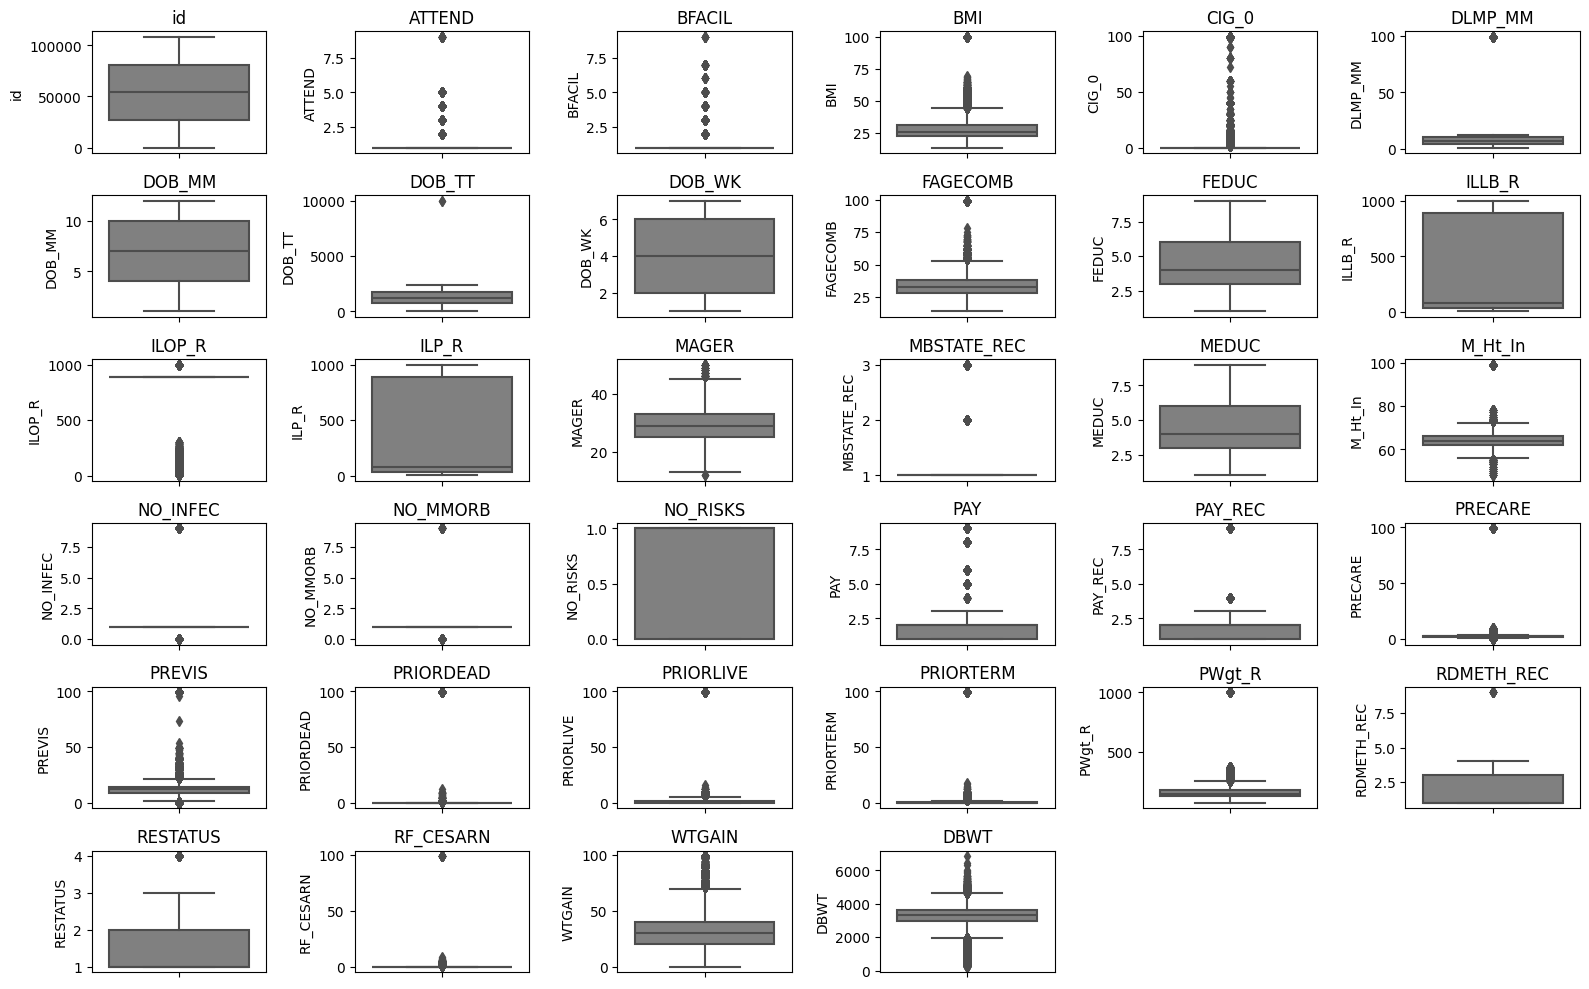

In [5]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(16, 10))

for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[column], color='grey')
    plt.title(column)

plt.tight_layout()
plt.show();

In [6]:
print('-----------------------')
print('The data skewness:')
print('-----------------------')
df[numeric_columns].skew().sort_values(ascending=False)

-----------------------
The data skewness:
-----------------------


RF_CESARN      45.428915
NO_MMORB       25.049304
PRIORLIVE      21.458142
PRIORDEAD      21.018721
PRIORTERM      17.480384
NO_INFEC       16.586987
BFACIL         12.350444
CIG_0           9.190039
PRECARE         6.030924
PWgt_R          5.722663
PREVIS          5.275761
DLMP_MM         4.076884
BMI             4.010472
M_Ht_In         3.959268
PAY             3.488354
PAY_REC         3.380574
ATTEND          2.742304
FAGECOMB        2.037167
RESTATUS        1.421419
WTGAIN          1.396543
MBSTATE_REC     1.350168
RDMETH_REC      0.965677
FEDUC           0.447942
ILLB_R          0.360567
ILP_R           0.303049
MEDUC           0.292490
MAGER           0.078299
id              0.000000
DOB_WK         -0.023255
DOB_MM         -0.037729
DOB_TT         -0.051454
NO_RISKS       -0.799303
DBWT           -0.881886
ILOP_R         -1.683011
dtype: float64

Better reduce skewness

In [7]:
numeric_columns_to_normalize = [col for col in numeric_columns if col not in ['id', 'DBWT']]
numeric_data = df[numeric_columns_to_normalize]

# Box-Cox transformation
normalized_data = pd.DataFrame()
for column in numeric_data.columns:
    normalized_column = None
    if column in numeric_columns_to_normalize:
        normalized_column, _ = boxcox(numeric_data[column] + 1)  # Add 1 to avoid non-positive values
    else:
        normalized_column = numeric_data[column]
    normalized_data[column] = normalized_column

# Min-Max scaling to the normalized data
scaler = MinMaxScaler()
normalized_data_scaled = scaler.fit_transform(normalized_data)
normalized_data_scaled = pd.DataFrame(normalized_data_scaled, columns=numeric_data.columns)
normalized_data_scaled[['id', 'DBWT']] = df[['id', 'DBWT']]
df[numeric_columns_to_normalize] = normalized_data_scaled[numeric_columns_to_normalize]
skewness_after = df[numeric_columns_to_normalize].skew()

In [8]:
print("Skewness after normalization:\n", df[numeric_columns].skew().sort_values(ascending=False))

Skewness after normalization:
 PRIORDEAD      8.336997
CIG_0          2.921733
RF_CESARN      1.878805
ATTEND         1.571139
MBSTATE_REC    1.287854
NO_MMORB       1.039909
PRIORTERM      1.024249
RESTATUS       0.860390
RDMETH_REC     0.698640
PAY            0.140748
WTGAIN         0.100523
PAY_REC        0.100196
PREVIS         0.083967
PRIORLIVE      0.080969
NO_INFEC       0.061013
FAGECOMB       0.036811
BMI            0.018077
ILLB_R         0.006677
BFACIL         0.000000
id             0.000000
ILP_R         -0.005471
PWgt_R        -0.016423
FEDUC         -0.025930
MAGER         -0.027188
MEDUC         -0.038043
DLMP_MM       -0.068816
DOB_WK        -0.126952
DOB_MM        -0.176737
DOB_TT        -0.280084
M_Ht_In       -0.322547
PRECARE       -0.471683
NO_RISKS      -0.799303
DBWT          -0.881886
ILOP_R        -1.607746
dtype: float64


## Feature Engineering
- Creating new values
- One-hot encoding
- Dropping the unnecessary

In [9]:
categorical_columns = ['DMAR', 'LD_INDL', 'RF_CESAR', 'SEX']
one_hot_encoded = pd.get_dummies(df[categorical_columns], prefix=categorical_columns)
df = df.drop(columns=categorical_columns)
df = pd.concat([df, one_hot_encoded], axis=1)
print(df.head())

   id    ATTEND  BFACIL       BMI     CIG_0   DLMP_MM    DOB_MM    DOB_TT  \
0   0  0.000000     0.0  0.399261  0.000000  0.623126  0.840567  0.200353   
1   1  0.000000     0.0  0.389044  0.992832  0.348899  1.000000  0.280862   
2   2  0.000000     0.0  0.680019  0.000000  0.272615  1.000000  0.177736   
3   3  0.000000     0.0  0.603308  0.000000  0.493680  0.315044  0.224936   
4   4  0.963413     0.0  0.592240  0.000000  0.454617  0.216402  0.117331   

     DOB_WK  FAGECOMB     FEDUC    ILLB_R    ILOP_R     ILP_R     MAGER  \
0  0.692700  1.000000  1.000000  0.979147  0.828157  0.978355  0.614987   
1  0.848510  0.785130  0.741710  0.556847  1.000000  1.000000  0.787741   
2  0.188168  0.681975  0.518679  0.602211  1.000000  1.000000  0.787741   
3  0.188168  1.000000  1.000000  0.979147  0.828157  0.978355  0.352670   
4  0.188168  0.681975  0.380983  0.483466  0.828157  0.473973  0.486472   

   MBSTATE_REC     MEDUC   M_Ht_In  NO_INFEC  NO_MMORB  NO_RISKS       PAY  \
0     0.

## Splitting the dataset
- splitting the train set to validation

In [11]:
# splitting df dataset into train and validation

X = df.drop('DBWT', axis=1)
y = df['DBWT']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

## Evaluating Models
- Winkler Score

In [12]:
# Winkler scoring

# Notice that we use absolute values due to the possibility of 'quantile crossing' where lower > upper.
def WIS_and_coverage(y_true,lower,upper,alpha):

    assert np.isnan(y_true) == False, "y_true contains NaN value(s)"
    assert np.isinf(y_true) == False, "y_true contains inf values(s)"
    assert np.isnan(lower)  == False, "lower interval value contains NaN value(s)"
    assert np.isinf(lower)  == False, "lower interval value contains inf values(s)"
    assert np.isnan(upper)  == False, "upper interval value contains NaN value(s)"
    assert np.isinf(upper)  == False, "upper interval value contains inf values(s)"
    assert alpha > 0 and alpha <= 1,  f"alpha should be (0,1]. Found: {alpha}"

    # WIS for one single row
    score = np.abs(upper-lower)
    if y_true < np.minimum(upper,lower):
        score += ((2/alpha) * (np.minimum(upper,lower) - y_true))
    if y_true > np.maximum(upper,lower):
        score += ((2/alpha) * (y_true - np.maximum(upper,lower)))
    # coverage for one single row
    coverage  = 1 # assume is within coverage
    if (y_true < np.minimum(upper,lower)) or (y_true > np.maximum(upper,lower)):
        coverage = 0
    return score, coverage

# vectorize the function
v_WIS_and_coverage = np.vectorize(WIS_and_coverage)

def score(y_true,lower,upper,alpha):
    """
    This is an implementation of the Winkler Interval score (https://otexts.com/fpp3/distaccuracy.html#winkler-score).
    The mean over all of the individual Winkler Interval scores (MWIS) is returned, along with the coverage.

    See:
    [1] Robert L. Winkler "A Decision-Theoretic Approach to Interval Estimation", Journal of the American Statistical Association, vol. 67, pp. 187-191 (1972) (https://doi.org/10.1080/01621459.1972.10481224)
    [2] Tilmann Gneiting and Adrian E Raftery "Strictly Proper Scoring Rules, Prediction, and Estimation", Journal of the American Statistical Association, vol. 102, pp. 359-378 (2007) (https://doi.org/10.1198/016214506000001437) (Section 6.2)

    Version: 1.0.4
    Author:  Carl McBride Ellis
    Date:    2023-12-07
    """

    assert y_true.ndim == 1, "y_true: pandas Series or 1D array expected"
    assert lower.ndim  == 1, "lower: pandas Series or 1D array expected"
    assert upper.ndim  == 1, "upper: pandas Series or 1D array expected"
    assert isinstance(alpha, float) == True, "alpha: float expected"

    WIS_scores, coverage = v_WIS_and_coverage(y_true,lower,upper,alpha)
    MWIS      = np.mean(WIS_scores)
    MWIS      = float(MWIS)
    coverage  = coverage.sum()/coverage.shape[0]
    coverage  = float(coverage)

    return MWIS,coverage

alpha = 0.1

## Modeling
- Hyperparameter tuning
- Random Forest
- XGBoost
- CatBoost

### Random-forest

In [13]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)
prediction_intervals = np.quantile(predictions, [alpha / 2, 1 - alpha / 2], axis=0)

results_df = pd.DataFrame({
    'y_true': y_test.values,
    'lower': prediction_intervals[0],
    'upper': prediction_intervals[1]
})

# MWIS score
MWIS, coverage = score(results_df["y_true"], results_df["lower"], results_df["upper"], alpha)

# Print MWIS score and coverage
print("MWIS score:", round(MWIS, 3))
print("Coverage:", round(coverage * 100, 1), "%")

RandomForestRegressor(random_state=42)

MWIS score: 3977.674
Coverage: 57.4 %


### XGBoost x Optuna

In [14]:
# def objective(trial):
#     params = {
#         "n_estimators": 1000,
#         "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
#         "max_depth": trial.suggest_int("max_depth", 1, 10),
#         "subsample": trial.suggest_float("subsample", 0.05, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
#         "min_child_weight": trial.suggest_int("min_child_weight", 1, 100),
#     }

#     model = XGBRegressor(**params, silent=True)
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     prediction_intervals = np.quantile(predictions, [alpha / 2, 1 - alpha / 2], axis=0)
#     results_df = pd.DataFrame({
#         'y_true': y_test.values,
#         'lower': prediction_intervals[0],
#         'upper': prediction_intervals[1]
#     })
#     MWIS, coverage = score(results_df["y_true"], results_df["lower"], results_df["upper"], alpha)
#     return MWIS

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # Retrieve the best parameters and best value from the study
# best_params_xgboost = study.best_params
# best_score_xgboost = study.best_value

# print("Best XGBoost parameters:", best_params_xgboost)
# print("Best XGBoost MWIS score:", round(best_score_xgboost, 3))

In [15]:
# Train the XGBoost model with the best parameters found
model = XGBRegressor(learning_rate=0.09185805664059714, 
                     max_depth=10, 
                     subsample=0.10627511169638384, 
                     colsample_bytree=0.8679770086150229, 
                     min_child_weight=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
prediction_intervals = np.quantile(predictions, [alpha / 2, 1 - alpha / 2], axis=0)
results_df = pd.DataFrame({
    'y_true': y_test.values,
    'lower': prediction_intervals[0],
    'upper': prediction_intervals[1]
})
MWIS, coverage = score(results_df["y_true"], results_df["lower"], results_df["upper"], alpha)
print("MWIS score:", round(MWIS, 3))
print("Coverage:", round(coverage * 100, 1), "%")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8679770086150229, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.09185805664059714, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

MWIS score: 3433.823
Coverage: 67.0 %


### CatBoost x Optuna

In [16]:
# def objective(trial):
#     params = {
#         "iterations": 1000,
#         "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
#         "depth": trial.suggest_int("depth", 1, 20),
#         "subsample": trial.suggest_float("subsample", 0.05, 1.0),
#         "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
#         "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
#     }

#     model = CatBoostRegressor(**params, silent=True)
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     prediction_intervals = np.quantile(predictions, [alpha / 2, 1 - alpha / 2], axis=0)
#     results_df = pd.DataFrame({
#         'y_true': y_test.values,
#         'lower': prediction_intervals[0],
#         'upper': prediction_intervals[1]
#     })
#     MWIS, coverage = score(results_df["y_true"], results_df["lower"], results_df["upper"], alpha)
#     return MWIS

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# best_params_catboost = study.best_params
# best_score_catboost = study.best_value

# print("Best CatBoost parameters:", best_params_catboost)
# print("Best CatBoost MWIS score:", round(best_score_catboost, 3))

# # Calculate MWIS score for the best parameters found
# model = CatBoostRegressor(**best_params_catboost, silent=True)
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)
# prediction_intervals = np.quantile(predictions, [alpha / 2, 1 - alpha / 2], axis=0)
# results_df = pd.DataFrame({
#     'y_true': y_test.values,
#     'lower': prediction_intervals[0],
#     'upper': prediction_intervals[1]
# })
# MWIS, coverage = score(results_df["y_true"], results_df["lower"], results_df["upper"], alpha)
# print("MWIS score:", round(MWIS, 3))
# print("Coverage:", round(coverage * 100, 1), "%")


In [17]:
# CatBoost w/best parameters from optuna
catboost_model = CatBoostRegressor(learning_rate=0.09886907332732021, 
                                    depth=10, 
                                    subsample=0.9045876332454507, 
                                    colsample_bylevel=0.5525983482670428, 
                                    min_data_in_leaf=10)
catboost_model.fit(X_train, y_train, verbose=False)

predictions = catboost_model.predict(X_test)

# Compute prediction intervals
prediction_intervals = np.quantile(predictions, [alpha / 2, 1 - alpha / 2], axis=0)

results_df = pd.DataFrame({
    'y_true': y_test.values,
    'lower': prediction_intervals[0],
    'upper': prediction_intervals[1]
})

# MWIS score
MWIS, coverage = score(results_df["y_true"], results_df["lower"], results_df["upper"], alpha)
print("MWIS score:", round(MWIS, 3))
print("Coverage:", round(coverage * 100, 1), "%")

MWIS score: 3411.028
Coverage: 67.3 %


## Uploading results